In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index= False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [ ]:
train_df[['SibSp', 'Survived']].groupby(['Survived'], as_index= False).mean()

,Survived,SibSp
0,0,0.553734
1,1,0.473684


In [ ]:
train_df[['Parch', 'Survived']].groupby(['Parch'], as_index= False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [ ]:
test_df = test_df.drop(['Ticket', 'Cabin'], axis= 1)
train_df.drop(['Ticket', 'Cabin'],axis=1, inplace= True)

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


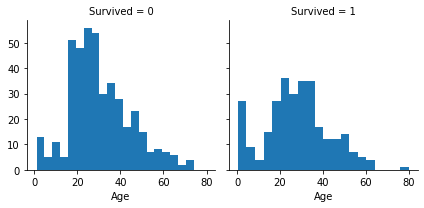

In [ ]:
plot1 = sns.FacetGrid(train_df, col = 'Survived')
plot1.map(plt.hist, 'Age', bins= 20)

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


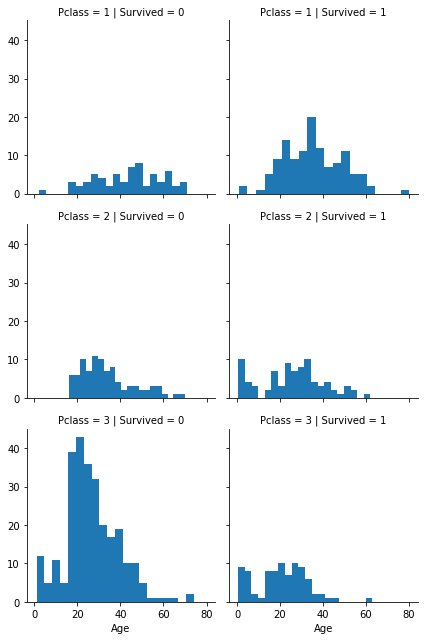

In [ ]:
plot2 = sns.FacetGrid(train_df, col= 'Survived', row= 'Pclass')
plot2.map(plt.hist, 'Age', bins= 20)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:645: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:650: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


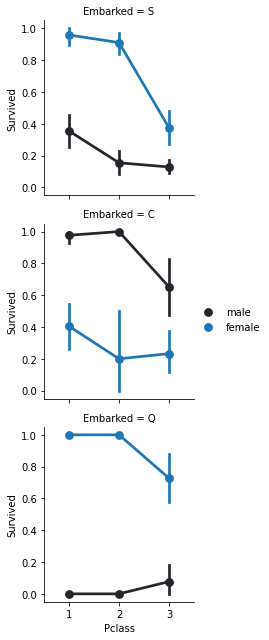

In [ ]:
plot3 = sns.FacetGrid(train_df, row= 'Embarked')
plot3.map(sns.pointplot, 'Pclass', 'Survived', 'Sex')
plot3.add_legend()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


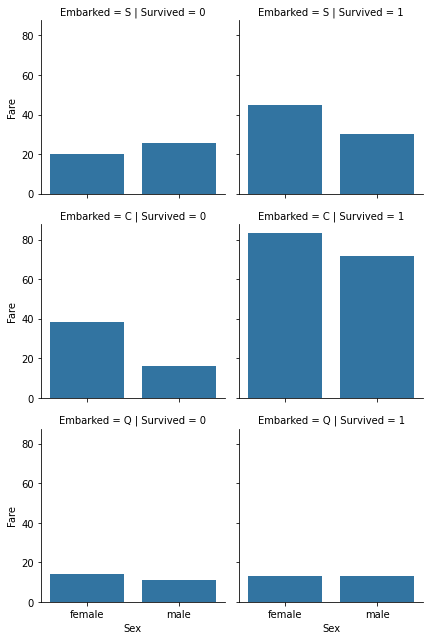

In [ ]:
plot4= sns.FacetGrid(train_df, row= 'Embarked', col= 'Survived')
plot4.map(sns.barplot, 'Sex', 'Fare', ci= None)
plot4.add_legend()

In [ ]:
mix = [train_df, test_df]
for title in mix:
  title['Title'] = title.Name.str.extract(' ([A-Za-z]+)\.', expand = False)
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [ ]:
for title in mix:
  title['Title'] = title['Title'].replace(['Capt', 'Col', 'Countess', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Mkor', 'Rev', 'Sir'], 'Rare')
  title['Title'] = title['Title'].replace('Ms', 'Miss')
  title['Title'] = title['Title'].replace('Mlle', 'Miss')
  title['Title'] = title['Title'].replace('Mme', 'Mrs')
train_df[['Title', 'Survived']].groupby(['Title'], as_index= False).mean()

,Title,Survived
0,Major,0.500000
1,Master,0.575000
2,Miss,0.702703
3,Mr,0.156673
4,Mrs,0.793651
5,Rare,0.333333


In [ ]:
title_replace = {'Mr': 1, 'Mrs': 2, 'Master': 3, 'Miss': 4, 'Rare': 4}
for title in mix:
  title['Title'] = title['Title'].map(title_replace)
  title['Title'] = title['Title'].fillna(0)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,4.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1.0


In [ ]:
train_df.drop(['PassengerId', 'Name'], axis = 1, inplace = True)
test_df.drop(['Name'], axis= 1, inplace= True)
train_df.shape, test_df.shape

((891, 9), (418, 9))

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


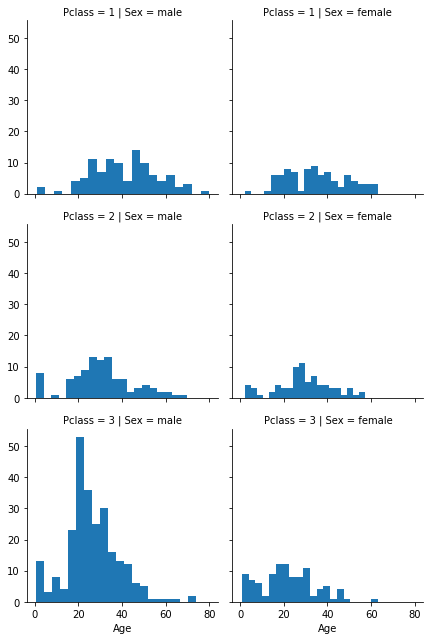

In [ ]:
plot5 = sns.FacetGrid(train_df, col= 'Sex', row= 'Pclass')
plot5.map(plt.hist, 'Age', bins= 20)
plot5.add_legend()

In [ ]:
for sex in mix:
  sex['Sex'] = sex['Sex'].map({'female': 0, 'male': 1}).astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22.0,1,0,7.2500,S,1.0
1,1,1,0,38.0,1,0,71.2833,C,2.0
2,1,3,0,26.0,0,0,7.9250,S,4.0
3,1,1,0,35.0,1,0,53.1000,S,2.0
4,0,3,1,35.0,0,0,8.0500,S,1.0


In [ ]:
guess_age = np.zeros((2,3))

In [ ]:
for corr_age in mix:
  for i in range(0,2):
    for j in range(0,3):
      guess_df= corr_age[(corr_age['Sex'] == i) & (corr_age['Pclass'] == j+1)]['Age'].dropna()
      age_g = guess_df.median()
      guess_age[i, j] = int(age_g/0.5 + 0.5)*0.5

  for i in range(0,2):
    for j in range(0,3):
        corr_age.loc[(corr_age.Age.isnull()) & (corr_age.Sex == i) & (corr_age.Pclass == j+1), 'Age'] = guess_age[i,j]

  corr_age['Age'] = corr_age['Age'].astype(int)
  
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22,1,0,7.2500,S,1.0
1,1,1,0,38,1,0,71.2833,C,2.0
2,1,3,0,26,0,0,7.9250,S,4.0
3,1,1,0,35,1,0,53.1000,S,2.0
4,0,3,1,35,0,0,8.0500,S,1.0


In [ ]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
x = train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index= False).mean()
x.sort_values(by= ['AgeBand'])

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [ ]:
for ages in mix:
  ages.loc[ages['Age'] <= 16, 'Age'] = 0
  ages.loc[(ages['Age'] > 16) & (ages['Age'] <= 32), 'Age'] = 1
  ages.loc[(ages['Age'] > 32) & (ages['Age'] <= 48), 'Age'] = 2
  ages.loc[(ages['Age'] > 48) & (ages['Age'] <= 64), 'Age'] = 3
  ages.loc[(ages['Age'] > 64), 'Age'] = 4
train_df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,1,1,1,0,7.2500,S,1.0,"(16.0, 32.0]"
1,1,1,0,2,1,0,71.2833,C,2.0,"(32.0, 48.0]"
2,1,3,0,1,0,0,7.9250,S,4.0,"(16.0, 32.0]"
3,1,1,0,2,1,0,53.1000,S,2.0,"(32.0, 48.0]"
4,0,3,1,2,0,0,8.0500,S,1.0,"(32.0, 48.0]"


In [ ]:
train_df.drop(['AgeBand'], inplace= True, axis= 1)

In [ ]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,1,1,0,7.2500,S,1.0
1,1,1,0,2,1,0,71.2833,C,2.0
2,1,3,0,1,0,0,7.9250,S,4.0
3,1,1,0,2,1,0,53.1000,S,2.0
4,0,3,1,2,0,0,8.0500,S,1.0


In [ ]:
for family in mix:
  family['FamilySize'] = family['SibSp'] + family['Parch'] + 1
train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index= False).mean().sort_values(by= ['Survived'])

,FamilySize,Survived
7,8,0.000000
8,11,0.000000
5,6,0.136364
4,5,0.200000
0,1,0.303538
6,7,0.333333
1,2,0.552795
2,3,0.578431
3,4,0.724138


In [ ]:
for ifamily in mix:
  ifamily['Isalone'] = 0
  ifamily.loc[ifamily['FamilySize'] == 1, 'Isalone'] = 1
train_df[['Isalone', 'Survived']].groupby(['Isalone'], as_index= False).mean()

,Isalone,Survived
0,0,0.505650
1,1,0.303538


In [ ]:
train_df.drop(['Parch', 'SibSp', 'FamilySize'], inplace= True, axis= 1)
test_df.drop(['Parch', 'SibSp', 'FamilySize'], inplace= True, axis= 1)


In [ ]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Isalone
0,0,3,1,1,7.2500,S,1.0,0
1,1,1,0,2,71.2833,C,2.0,0
2,1,3,0,1,7.9250,S,4.0,1
3,1,1,0,2,53.1000,S,2.0,0
4,0,3,1,2,8.0500,S,1.0,1


In [ ]:
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index= False).mean().sort_values(by= ['Survived'], ascending= False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [ ]:
x = train_df['Embarked'].mode()[0]
print(x)

S


In [ ]:
for depart in mix:
  depart['Embarked'] = depart['Embarked'].fillna(x)

In [ ]:
train_df['Embarked']= train_df['Embarked'].fillna(x)
train_df['Embarked'].isna().sum()

0

In [ ]:
for depart in mix:
  depart['Embarked'] = depart['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Isalone
0,0,3,1,1,7.2500,0,1.0,0
1,1,1,0,2,71.2833,1,2.0,0
2,1,3,0,1,7.9250,0,4.0,1
3,1,1,0,2,53.1000,0,2.0,0
4,0,3,1,2,8.0500,0,1.0,1


In [ ]:
test_fare= test_df['Fare'].median()

In [ ]:
test_df['Fare'].fillna(test_fare, inplace= True)
test_df['Fare'].isna().sum()

0

In [ ]:
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,Isalone
0,892,3,1,2,7.8292,2,1.0,1
1,893,3,0,2,7.0000,0,2.0,0
2,894,2,1,3,9.6875,2,1.0,1
3,895,3,1,1,8.6625,0,1.0,1
4,896,3,0,1,12.2875,0,2.0,0


In [ ]:
train_df['fareband']= pd.qcut(train_df['Fare'], 4)
train_df[['fareband', 'Survived']].groupby(['fareband'], as_index= False).mean().sort_values(by= ['Survived'])

,fareband,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [ ]:
for fare in mix:
  fare.loc[fare['Fare'] <= 7.91, 'Fare'] = 0
  fare.loc[(fare['Fare'] > 7.91) & (fare['Fare'] <= 14.454), 'Fare'] = 1
  fare.loc[(fare['Fare'] > 14.454) & (fare['Fare'] <= 31), 'Fare'] = 2
  fare.loc[(fare['Fare'] > 31) & (fare['Fare'] <= 512.329), 'Fare'] = 3
train_df.drop(['fareband'], axis= 1, inplace= True)
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Isalone
0,0,3,1,1,0.0,0,1.0,0
1,1,1,0,2,3.0,1,2.0,0
2,1,3,0,1,1.0,0,4.0,1
3,1,1,0,2,3.0,0,2.0,0
4,0,3,1,2,1.0,0,1.0,1
5,0,3,1,1,1.0,2,1.0,1
6,0,1,1,3,3.0,0,1.0,1
7,0,3,1,0,2.0,0,3.0,0
8,1,3,0,1,1.0,0,2.0,0
9,1,2,0,0,2.0,1,2.0,0


In [ ]:
x_train = train_df.drop('Survived', axis= 1)
y_train = train_df['Survived']
y_test = test_df.drop('PassengerId', axis= 1).copy()
x_train.shape, y_train.shape, y_test.shape

((891, 7), (891,), (418, 7))

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)
svc_pred = svc.predict(y_test)
svc_acc = round(svc.score(x_train, y_train), 2)
svc_acc

0.74

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
dtc_pred = dtc.predict(y_test)
dtc_acc= round(dtc.score(x_train, y_train)*100, 2)
dtc_acc

86.87

In [ ]:
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': dtc_pred
})

In [ ]:
submission.to_csv('submission4.csv', index=False)